<a href="https://colab.research.google.com/github/Nayal17/Opencv-Starter/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/lordloh/playing-cards.git

fatal: destination path 'playing-cards' already exists and is not an empty directory.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(r'/content/playing-cards/img/cards-[D2]-001.jpg',1) # 0 for grayscale, 1-->color(default),
# -1--> load image as such including alpha channel

Below color in blue instead of red, because opencv reads the image in bgr format and the image is in rgb format

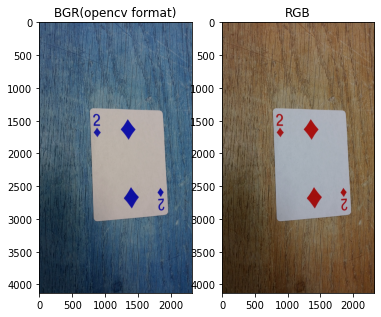

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(121);plt.imshow(img) ; plt.title("BGR(opencv format)") # cmap = 'gray' for grayscale
plt.subplot(122);plt.imshow(img[:,:,::-1]) ; plt.title("RGB") 
plt.show()

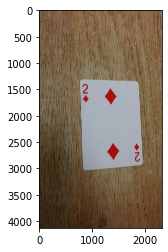

In [ ]:
# we can also change color channel format as follows
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

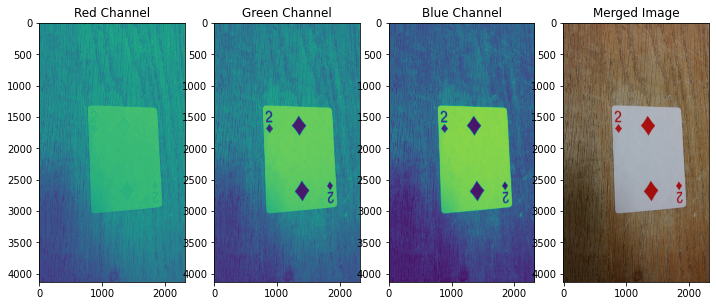

In [ ]:
plt.figure(figsize=(12,8))
b,g,r = cv2.split(img)
plt.subplot(141);plt.imshow(r);plt.title("Red Channel")
plt.subplot(142);plt.imshow(g);plt.title("Green Channel")
plt.subplot(143);plt.imshow(b);plt.title("Blue Channel")
plt.subplot(144);plt.imshow(cv2.merge((b,g,r))[:,:,::-1]);plt.title("Merged Image")
plt.show()

# HSV format

HSV is a cylindrical color model that remaps the RGB primary colors into dimensions that are easier for humans to understand. Like the Munsell Color System, these dimensions are hue, saturation, and value.

>**Hue**(color) specifies the angle of the color on the RGB color circle. A 0° hue results in red, 120° results in green, and 240° results in blue.

>**Saturation**(purity) controls the amount of color used. A color with 100% saturation will be the purest color possible, while 0% saturation yields grayscale.

>**Value**(brightness) controls the brightness of the color. A color with 0% brightness is pure black while a color with 100% brightness has no black mixed into the color. Because this dimension is often referred to as brightness, the HSV color model is sometimes called HSB.

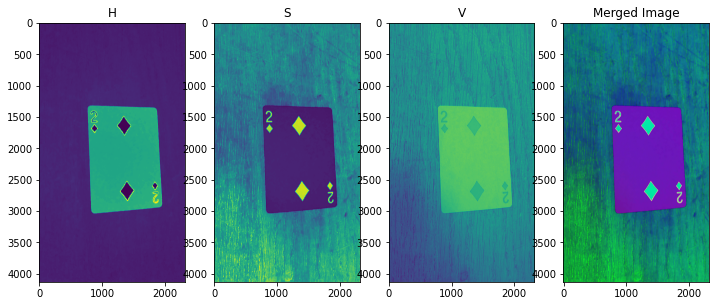

In [ ]:
hsv_image = cv2.cvtColor(img ,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,8))
h, s, v = cv2.split(hsv_image)
plt.subplot(141);plt.imshow(h);plt.title("H")
plt.subplot(142);plt.imshow(s);plt.title("S")
plt.subplot(143);plt.imshow(v);plt.title("V")
plt.subplot(144);plt.imshow(cv2.merge((h,s,v)));plt.title("Merged Image")
plt.show()

In [ ]:
cv2.imwrite('temp.jpg',hsv_image) # Saving Image

True

In [ ]:
# will not work for jupyter

# window = cv2.namedWindow("w1")
# cv2.imshow(window,hsv_image)
# cv2.waitkey(8000) # wait for 8000 ms or 8 sec, if 0 the need keyboard interuption 
# cv2.destroyWindow(window)

# window = cv2.namedWindow("w2")
# while True:
#   cv2.imshow(window,hsv_image)
#   keypress = cv2.waitkey(1) 
#   if keypress == ord('e'):
#     break
# cv2.destroyWindow(window)


# Cropping Image

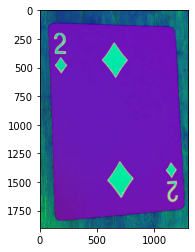

In [ ]:
cropped_image = hsv_image[1200:3100,700:2000]
plt.imshow(cropped_image)
plt.show()

#Resizing

**Interpolation tips:**

If you are enlarging the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are shrinking the image, you should prefer to use INTER_AREA interpolation.

Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

INTER_NEAREST – a nearest-neighbor interpolation

INTER_LINEAR – a bilinear interpolation (used by default)

INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.

INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood

INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

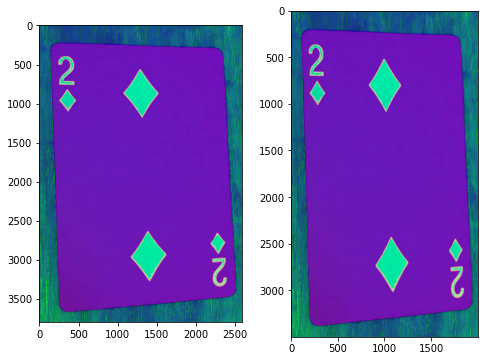

In [ ]:
plt.figure(figsize=(8,6))
factor_scale = cv2.resize(cropped_image,dsize=None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC) # doubles the image size
plt.subplot(121);plt.imshow(factor_scale)

size_scale = cv2.resize(cropped_image,dsize=(2000,3500),interpolation=cv2.INTER_CUBIC) # (w,h)
plt.subplot(122);plt.imshow(size_scale)
plt.show()

#Flipping

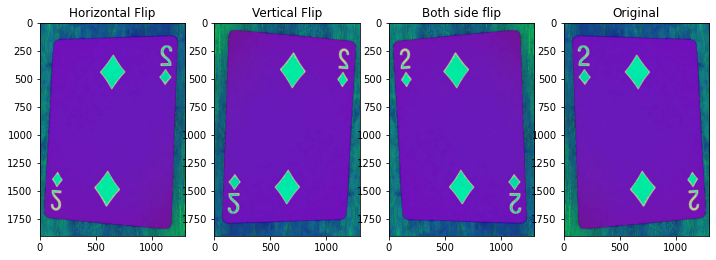

In [ ]:
plt.figure(figsize=(12,8))
hf = cv2.flip(cropped_image,1)
vf = cv2.flip(cropped_image,0)
hvf = cv2.flip(cropped_image,-1)

plt.subplot(141);plt.imshow(hf);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(vf);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(hvf);plt.title("Both side flip")
plt.subplot(144);plt.imshow(cropped_image);plt.title("Original")
plt.show()

#Annotation

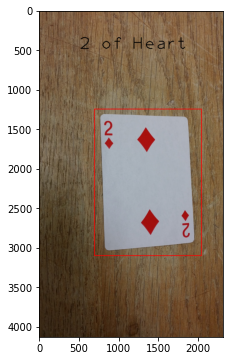

In [ ]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ann_img = rgb_img.copy()

plt.figure(figsize=(16,6))
cv2.line(ann_img,(700,1250),(2050,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(2050,3100),(2050,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(700,3100),(700,1250),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)
cv2.line(ann_img,(700,3100),(2050,3100),color=(255,0,0),thickness=8, lineType=cv2.LINE_AA)

text = "2 of Heart"
fontScale = 15.2
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0,0,0)
fontThickness = 10
cv2.putText(ann_img,text,(500,500),fontFace,fontScale,fontColor,fontThickness)

plt.imshow(ann_img)
plt.show()

# Image Enhancement using mathematical operations

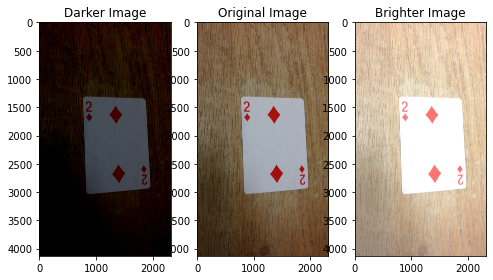

In [ ]:
matrix = np.ones(rgb_img.shape, dtype='uint8') * 100

dark_img = cv2.subtract(rgb_img, matrix) # adding using + operator will give wrong results as it does not saturates at 0 and 255. e.g., 255+2 = 2.
brighter_img = cv2.add(rgb_img, matrix)

plt.figure(figsize=(8,10))
plt.subplot(131);plt.imshow(dark_img);plt.title("Darker Image")
plt.subplot(132);plt.imshow(rgb_img);plt.title("Original Image")
plt.subplot(133);plt.imshow(brighter_img);plt.title("Brighter Image")
plt.show()

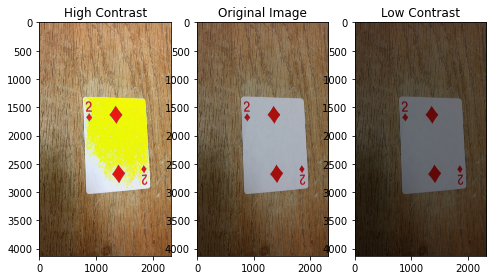

In [ ]:
matrix1 = np.ones(rgb_img.shape) * 1.4
matrix2 = np.ones(rgb_img.shape) * 0.6

high_contrast_img = np.uint8(cv2.multiply(np.float64(rgb_img), matrix1)) 
low_contrast_img = np.uint8(cv2.multiply(np.float64(rgb_img), matrix2))

plt.figure(figsize=(8,10))
plt.subplot(131);plt.imshow(high_contrast_img);plt.title("High Contrast")
plt.subplot(132);plt.imshow(rgb_img);plt.title("Original Image")
plt.subplot(133);plt.imshow(low_contrast_img);plt.title("Low Contrast")
plt.show()